# Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(15)
import json
import shutil
from termcolor import colored
from scipy.stats import skew

# Importing Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Final_Data_with_Features.csv")
data.drop(columns='Unnamed: 0',inplace=True)
data.sort_values(by='pid',inplace=True)

# Dataset Overview

In [ ]:
data.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,playlist_duration_ms,num_artists,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,...,4.0,-7.105,0.0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,4.0
1243,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,...,11.0,-4.288,1.0,0.0430,0.03390,0.000142,0.2310,0.430,120.011,4.0
1279,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,...,1.0,-3.928,1.0,0.0759,0.00663,0.000000,0.0939,0.720,120.048,4.0
1298,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,...,4.0,-6.437,0.0,0.0738,0.02250,0.000052,0.1540,0.576,126.027,4.0
1316,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,...,4.0,-4.421,1.0,0.1940,0.15900,0.000000,0.2740,0.728,86.938,4.0


In [ ]:
def print_heading(text):
  print(colored(text, attrs=['bold','blink'], color='yellow'))

def dash_line():
    print("-----------------------------------------------------------------")

def dataset_info(dataset):
    print("Shape of dataset: ")
    print('Total Number of samples: ',dataset.shape[0])
    print('Total Number of features: ',dataset.shape[1])
    dash_line()
    print("\nFloat columns: ")
    float_cols = [f for f in dataset.columns if dataset[f].dtype == 'float64']
    print(float_cols)
    print('Num of float cols: ',len(float_cols))
    dash_line()
    print("\nInteger columns: ")
    int_cols = [f for f in dataset.columns if dataset[f].dtype == 'int64']
    print(int_cols)
    print('Num of Int cols: ',len(int_cols))
    dash_line()
    print("\nString columns: ")
    str_cols = [f for f in dataset.columns if dataset[f].dtype == object]
    print(str_cols)
    print('\nNum of string cols: ',len(str_cols))
    dash_line()
    print("\nMissing Values in each column: ")
    missing_cols = [f for f in dataset.columns if dataset[f].isna().any()]
    print(dataset[missing_cols].isna().sum())
    dash_line()
    print("\nChecking for duplicate rows: ")
    duplicate = dataset[dataset.duplicated()]
    if(len(duplicate)==0):
        print('No duplicate rows in Dataset !')
    else:
        print('There are duplicate rows in Dataset !')
        print(duplicate)

dataset_info(data)

Shape of dataset: 
Total Number of samples:  266039
Total Number of features:  34
-----------------------------------------------------------------

Float columns: 
['album_total_tracks', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
Num of float cols:  14
-----------------------------------------------------------------

Integer columns: 
['pid', 'modified_at', 'num_tracks', 'num_albums', 'num_followers', 'num_edits', 'playlist_duration_ms', 'num_artists', 'pos', 'track_duration_ms']
Num of Int cols:  10
-----------------------------------------------------------------

String columns: 
['name', 'description', 'artist_name', 'track_uri', 'artist_uri', 'track_name', 'album_uri', 'album_name', 'release_date']

Num of string cols:  9
-----------------------------------------------------------------

Missing Values in each column: 
description           260712
release_

# Data Exploration

In [ ]:
data[['num_tracks', 'num_albums', 'num_followers', 'num_edits', 'playlist_duration_ms', 'num_artists', 'pos', 'track_duration_ms']].describe()

,num_tracks,num_albums,num_followers,num_edits,playlist_duration_ms,num_artists,pos,track_duration_ms
count,266039.000000,266039.000000,266039.000000,266039.000000,2.660390e+05,266039.000000,266039.000000,2.660390e+05
mean,109.700612,78.486045,2.588173,28.413676,2.569120e+07,58.081883,54.350580,2.341710e+05
std,62.857868,47.731872,41.247326,28.718944,1.508906e+07,36.989197,48.162233,7.359974e+04
min,5.000000,2.000000,1.000000,2.000000,9.238790e+05,3.000000,0.000000,0.000000e+00
25%,57.000000,40.000000,1.000000,7.000000,1.310109e+07,30.000000,17.000000,1.982740e+05
50%,100.000000,71.000000,1.000000,18.000000,2.330853e+07,51.000000,40.000000,2.249060e+05
75%,157.000000,110.000000,2.000000,39.000000,3.621352e+07,78.000000,79.000000,2.586400e+05
max,248.000000,233.000000,2699.000000,178.000000,7.997390e+07,199.000000,247.000000,5.279768e+06


In [ ]:
print("There are a total of "+str(len(data['pid'].unique()))+" unique playlists")
print("There are a total of "+str(len(data['description'].unique()))+" unique playlists which has description available")
print("There are a total of "+str(len(data['track_uri'].unique()))+" unique tracks")
print("There are a total of "+str(len(data['track_uri'].unique()))+" unique artists")
print("There are a total of "+str(len(data['album_uri'].unique()))+" unique albums")

There are a total of 4000 unique playlists
There are a total of 77 unique playlists which has description available
There are a total of 93037 unique tracks
There are a total of 93037 unique artists
There are a total of 47737 unique albums


# Dealing With Missing Values

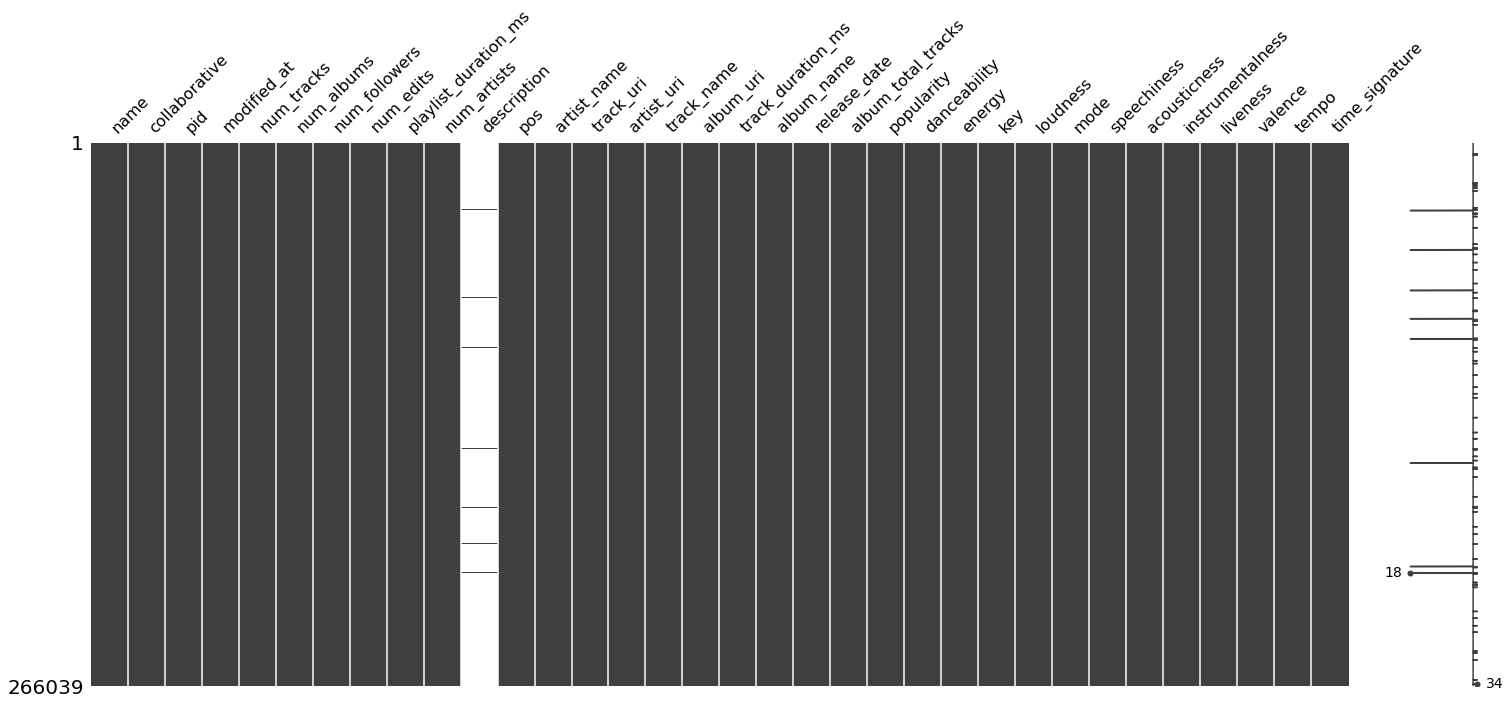

In [ ]:
import missingno as msno
msno.matrix(data)

Since there are alot of playlists with missing description, we can drop this feature

In [ ]:
data.drop(columns='description',inplace=True)

Since there are 8 number of samples with missing track features, it is better to drop them.

In [ ]:
data.dropna(subset=['release_date'],inplace=True,axis=0)

In [ ]:
print("Missing values in the dataset: ",data.isna().sum().sum())

Missing values in the dataset:  0


# Data Visualization

In [ ]:
cols_with_skewness=[]
def calculate_skewness(dataset,cols,type_col):
  s = skew(dataset[cols])
  skewness = {}
  for col,value in zip(cols,s):
    skewness[col] = value
  print_heading(type_col+" columns Skewness: \n")
  display(skewness) 
  return skewness

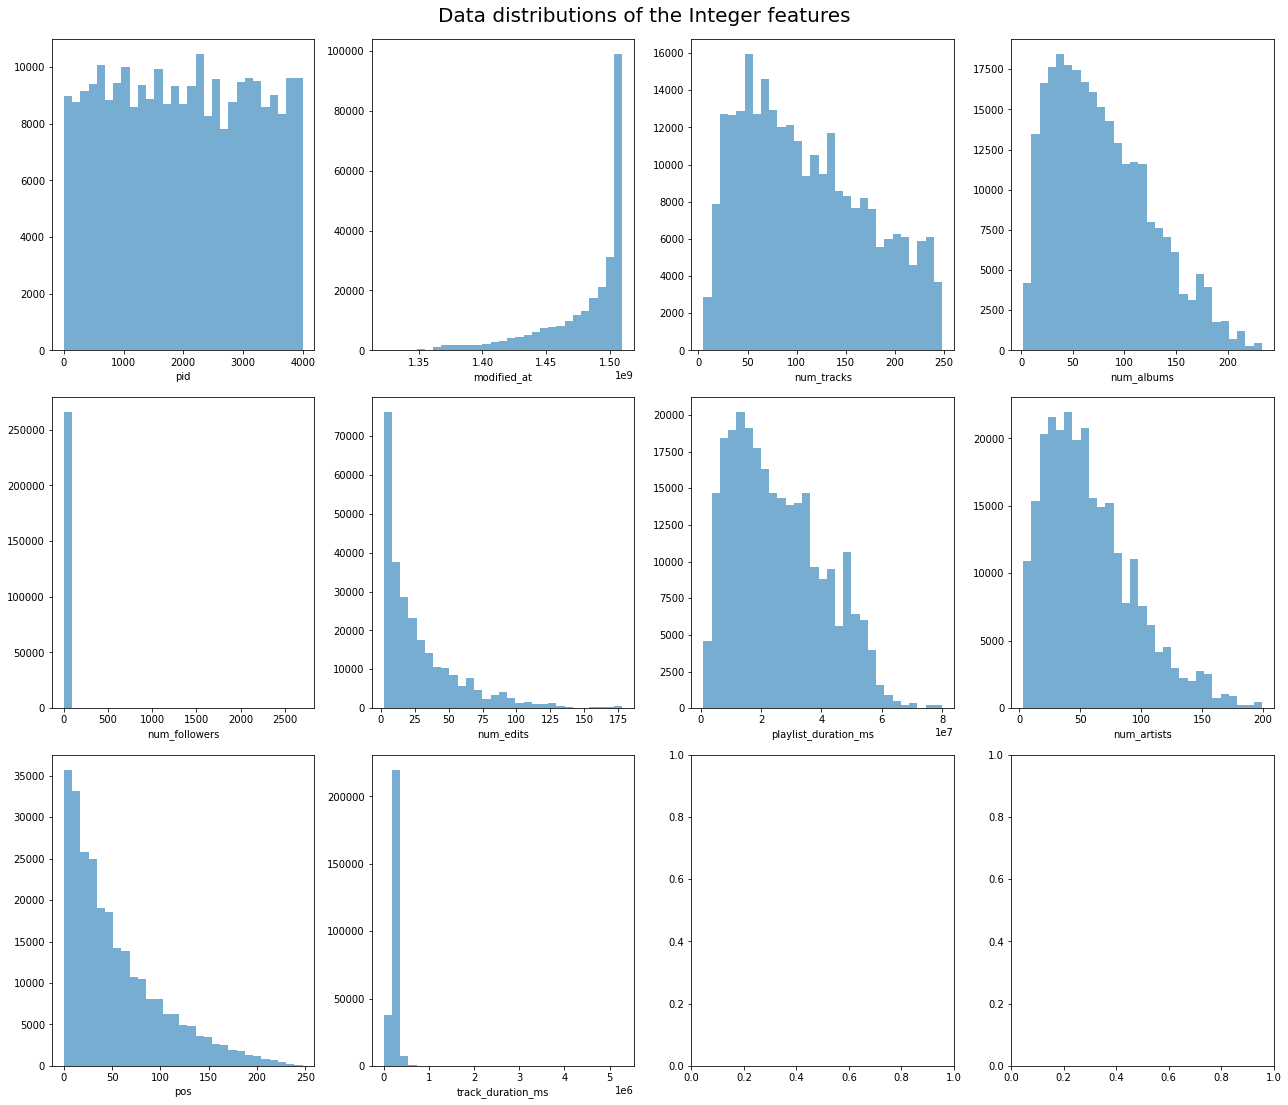

In [ ]:
int_cols = [f for f in data.columns if data[f].dtype == int]
_, axs = plt.subplots(3, 4, figsize=(18,15))
i=0
for f, ax in zip(int_cols, axs.ravel()):
    mi = data[f].min()
    ma = data[f].max()
    bins = np.linspace(mi, ma, 30)
    ax.hist(data[f], bins=bins, alpha=0.6)
    ax.set_xlabel(f)
plt.tight_layout(w_pad=1)
plt.suptitle('Data distributions of the Integer features', fontsize=20, y=1.02)
plt.show()

In [ ]:
int_skew = calculate_skewness(data,int_cols,"Integer")
cols_with_skewness.append('modified_at')
cols_with_skewness.append('num_edits')

Integer columns Skewness: 



{'pid': 0.017808960867489464,
 'modified_at': -1.5708263246583083,
 'num_tracks': 0.4061981401693917,
 'num_albums': 0.6532191347624093,
 'num_followers': 57.32408837141191,
 'num_edits': 1.7343797592157533,
 'playlist_duration_ms': 0.5236201051400035,
 'num_artists': 0.9187385911738083,
 'pos': 1.195362099841709,
 'track_duration_ms': 13.061421293930474}

'modified_at' seems to be left skewed     
    
'num_edits' seems to be right skewed

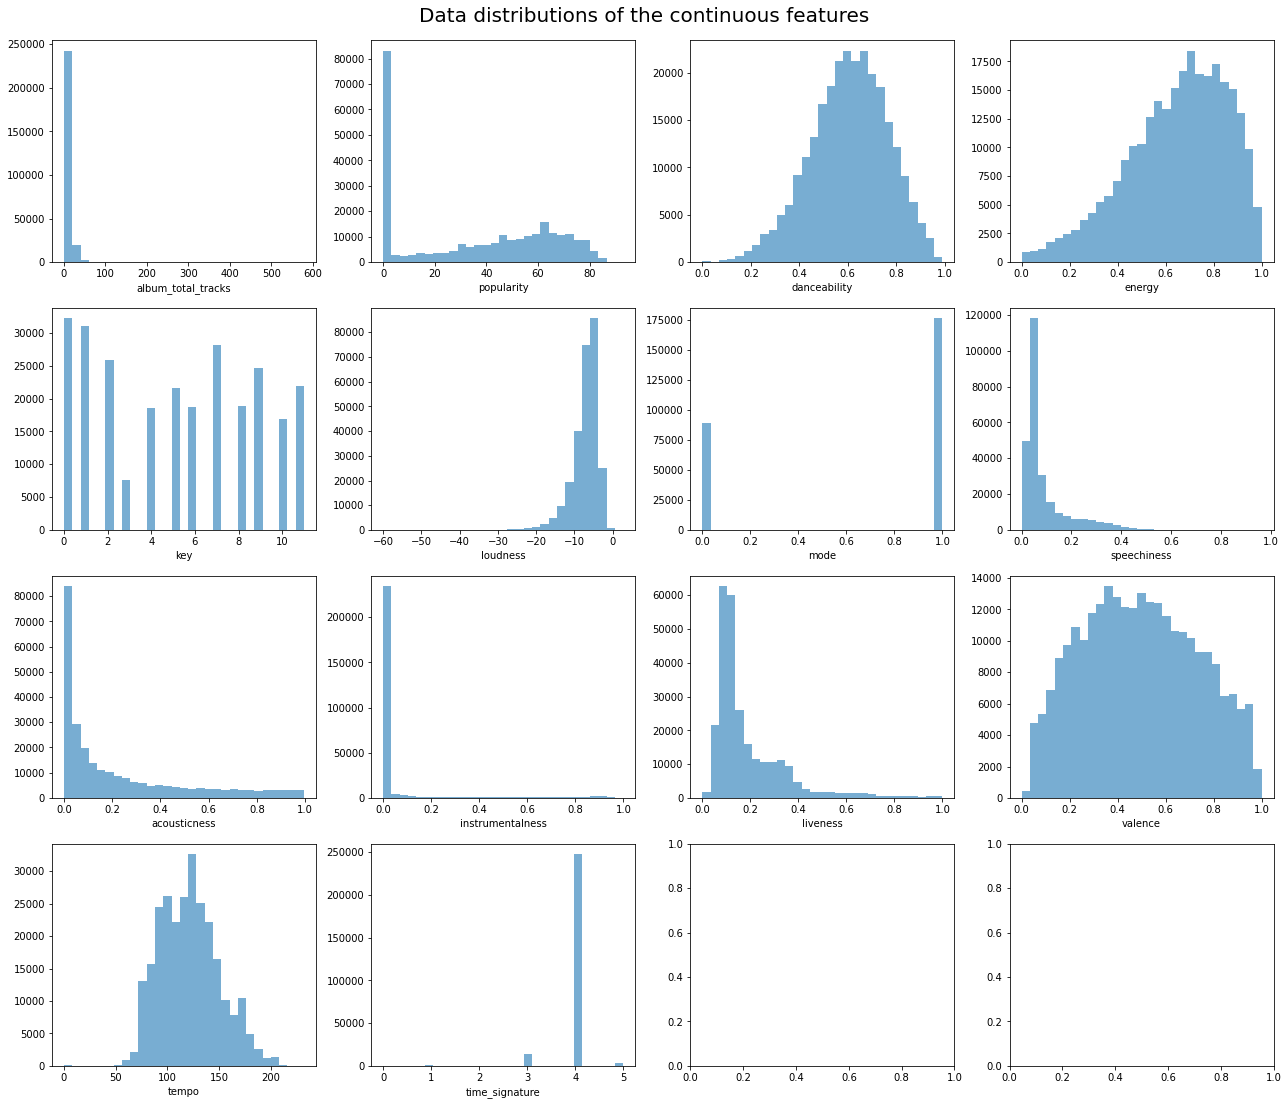

In [ ]:
import warnings
float_cols = [f for f in data.columns if data[f].dtype == float]

fig, axs = plt.subplots(4, 4, figsize=(18,15))
for f, ax in zip(float_cols, axs.ravel()):
    mi = data[f].min()
    ma = data[f].max()
    bins = np.linspace(mi, ma, 30)
    ax.hist(data[f], bins=bins, alpha=0.6)
    ax.set_xlabel(f)
plt.tight_layout(w_pad=1)
plt.suptitle('Data distributions of the continuous features', fontsize=20, y=1.02)
plt.show()

In [ ]:
float_skew = calculate_skewness(data,float_cols,"Float")
cols_with_skewness.append('speechiness')
cols_with_skewness.append('liveness')

Float columns Skewness: 



{'album_total_tracks': 6.593166804845857,
 'popularity': -0.04023786418535345,
 'danceability': -0.307191329691003,
 'energy': -0.6116277854029948,
 'key': 0.03388847864952774,
 'loudness': -2.101493692230863,
 'mode': -0.6913052307054481,
 'speechiness': 2.5464790626851856,
 'acousticness': 1.2656000249813504,
 'instrumentalness': 3.7201500426519707,
 'liveness': 2.2136494725426727,
 'valence': 0.09932104654760834,
 'tempo': 0.3503231864768454,
 'time_signature': -4.652308881089511}

'speechiness' seems to be right skewed      
'liveness' seems to be right skewed

# Dealing with skewness


In [ ]:
skew_dict = {**float_skew , **int_skew}
skewed_cols_dict = {}
for col in skew_dict:
  if col in cols_with_skewness:
    skewed_cols_dict[col] = skew_dict[col]

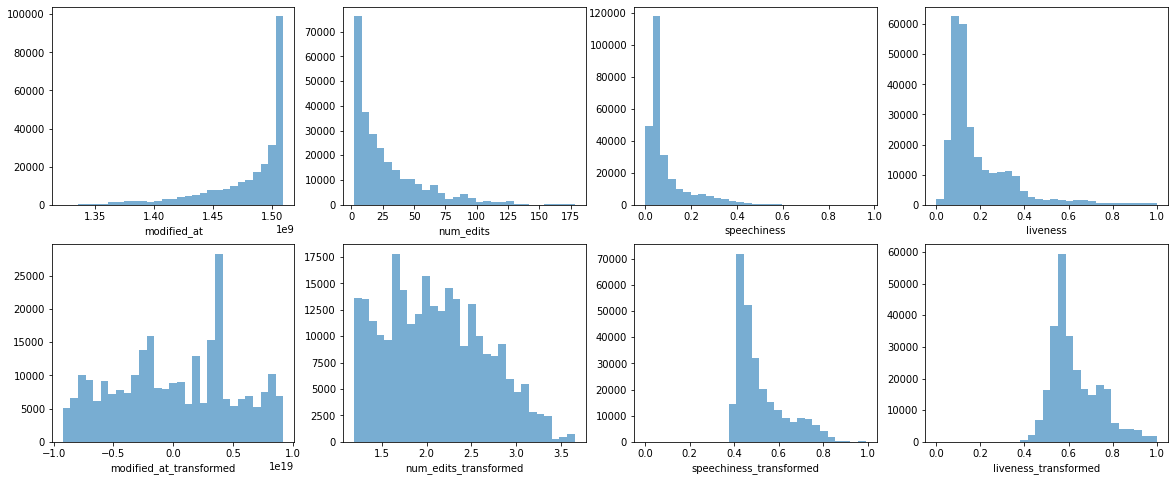

In [ ]:
skew_df = pd.DataFrame(data[cols_with_skewness],columns=cols_with_skewness)
for col in cols_with_skewness:
  new_col=col+"_transformed"
  if skewed_cols_dict[col] > 0:  # Right Skewed
    skew_df[new_col] = np.power(skew_df[col],(1/4))
  else:
    skew_df[new_col] = np.power(skew_df[col],(3))   #Left Skewed
fig, axs = plt.subplots(2, len(cols_with_skewness), figsize=(20,8))
for f, ax in zip(skew_df.columns, axs.ravel()):
    mi = skew_df[f].min()
    ma = skew_df[f].max()
    bins = np.linspace(mi, ma, 30)
    ax.hist(skew_df[f], bins=bins, alpha=0.6)
    ax.set_xlabel(f)

In [ ]:
_ = calculate_skewness(skew_df,skew_df.columns,"Transformed")

Transformed columns Skewness: 



{'modified_at': -1.5708263246583083,
 'num_edits': 1.7343797592157533,
 'speechiness': 2.5464790626851856,
 'liveness': 2.2136494725426727,
 'modified_at_transformed': -0.05024225334157423,
 'num_edits_transformed': 0.2739696641148397,
 'speechiness_transformed': 1.2337177899588432,
 'liveness_transformed': 0.8701468335591451}

In [ ]:
from re import search
cols = [ col for col in skew_df.columns if search("_transformed",col) ]
for col,col_transformed in zip(cols_with_skewness,cols):
  if search(col,col_transformed):
    data[col] = skew_df[col_transformed]
    print(col+" transformed in orignal data")

modified_at transformed in orignal data
num_edits transformed in orignal data
speechiness transformed in orignal data
liveness transformed in orignal data


# Co-Relations

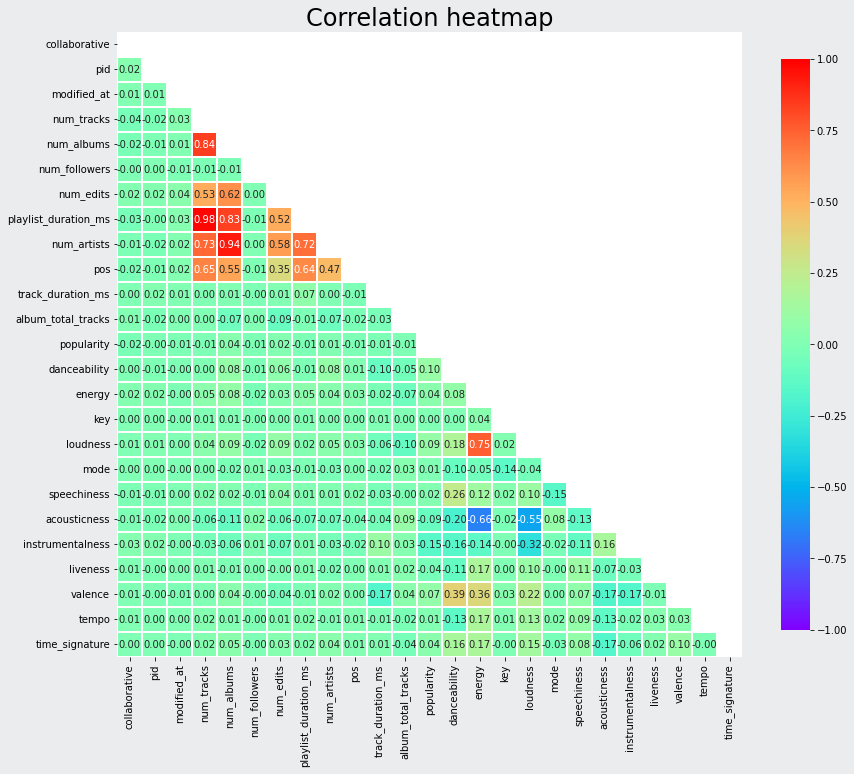

In [ ]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(14, 14), facecolor='#EAECEE')
cmap = sns.color_palette("rainbow", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1., center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.75},fmt='.2f')

ax.set_title('Correlation heatmap', fontsize=24, y= 1.05)
colorbar = ax.collections[0].colorbar

In [ ]:
def corr_relations(corr,thresh):
  positive_corr=[]
  negative_corr=[]
  cols = corr.columns
  for i in range(len(cols)):
    for j in range(len(cols)):
      if i>j:
        if corr[cols[i]][cols[j]] > 0:
          if corr[cols[i]][cols[j]] > thresh and corr[cols[i]][cols[j]] != 1:
            positive_corr.append((cols[i],cols[j],corr[cols[i]][cols[j]]))
        else:
          if corr[cols[i]][cols[j]] < -thresh and corr[cols[i]][cols[j]] != -1:
            negative_corr.append((cols[i],cols[j],corr[cols[i]][cols[j]]))
  return positive_corr,negative_corr

threshold = 0.5
p,n = corr_relations(corr,threshold)
print("Strong Positive Co-Relations between Features with threshold = ",threshold)
print()
display(p)
dash_line()
print("Strong Negative Co-Relations between Features with threshold = ",-threshold)
print()
display(n)

Strong Positive Co-Relations between Features with threshold =  0.5



[('num_albums', 'num_tracks', 0.8415447166107518),
 ('num_edits', 'num_tracks', 0.5299566460316026),
 ('num_edits', 'num_albums', 0.6163409150659508),
 ('playlist_duration_ms', 'num_tracks', 0.977662549636656),
 ('playlist_duration_ms', 'num_albums', 0.8319682926543831),
 ('playlist_duration_ms', 'num_edits', 0.5237533705040985),
 ('num_artists', 'num_tracks', 0.7269838343923531),
 ('num_artists', 'num_albums', 0.9355542001527783),
 ('num_artists', 'num_edits', 0.5776211268126814),
 ('num_artists', 'playlist_duration_ms', 0.7152958361571978),
 ('pos', 'num_tracks', 0.6524721120620393),
 ('pos', 'num_albums', 0.5490635615366086),
 ('pos', 'playlist_duration_ms', 0.6378924301360763),
 ('loudness', 'energy', 0.7507065639450008)]

-----------------------------------------------------------------
Strong Negative Co-Relations between Features with threshold =  -0.5



[('acousticness', 'energy', -0.6588128400948912),
 ('acousticness', 'loudness', -0.553673956621521)]

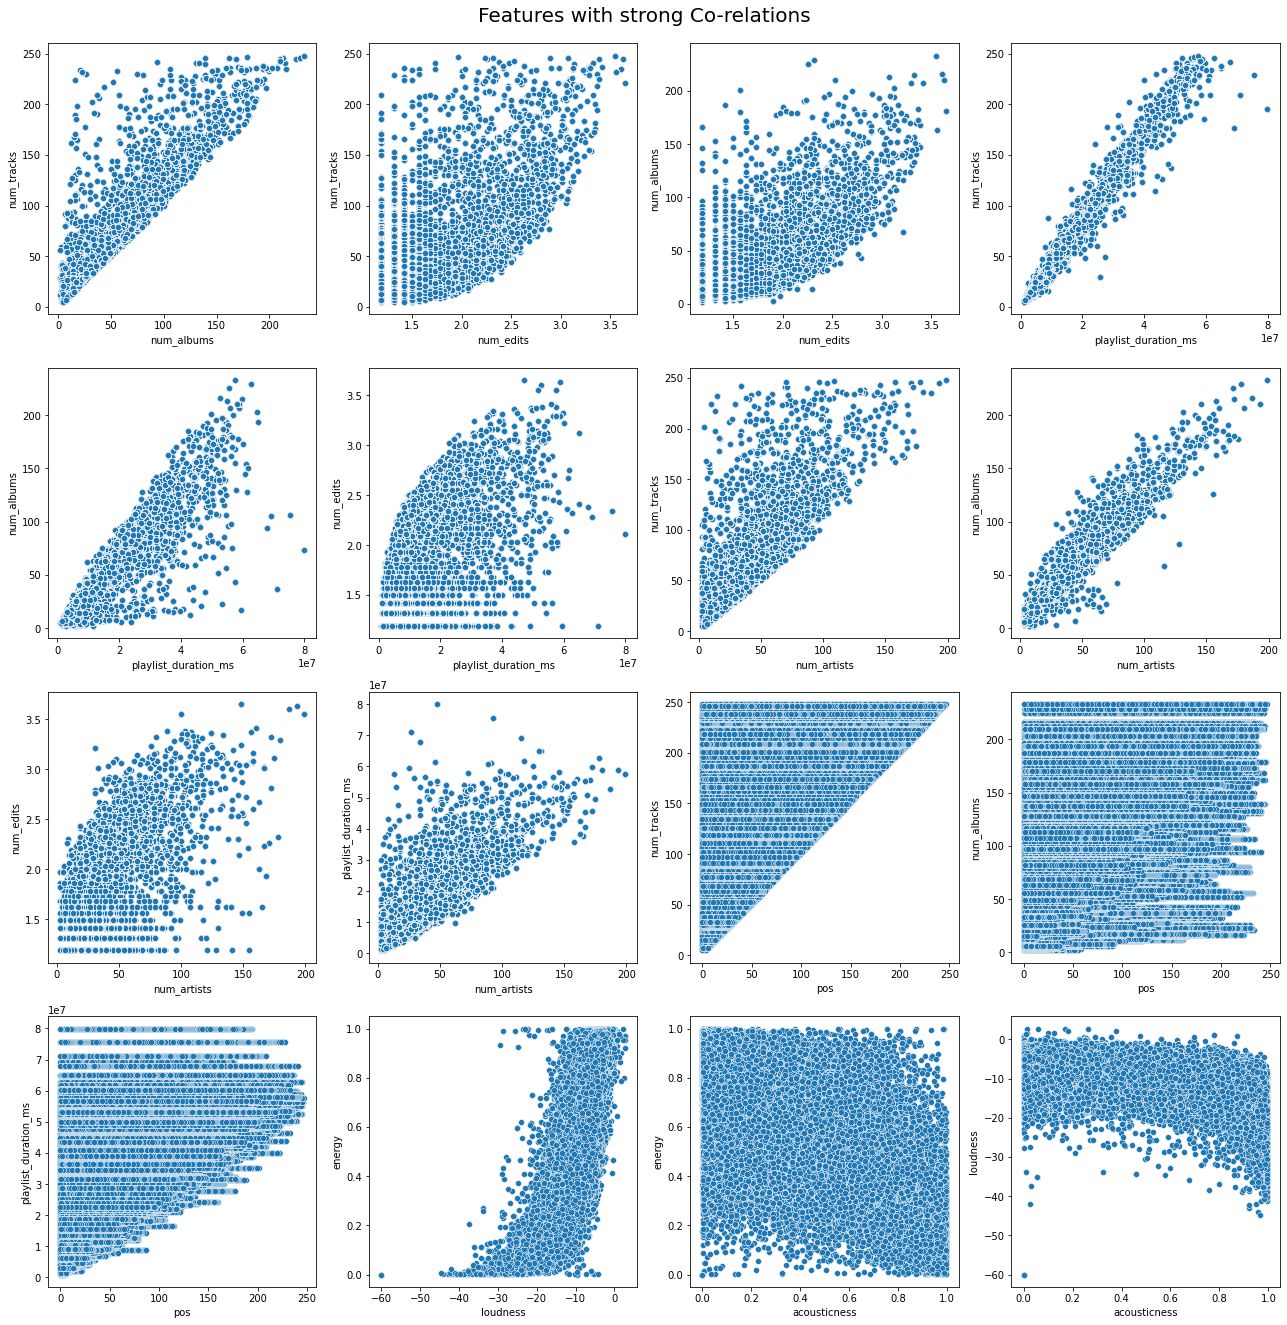

In [ ]:
for i in n:
  p.append(i)
fig, axs = plt.subplots(4, 4, figsize=(18,18))
for col, ax in zip(p, axs.ravel()):
    x=col[0]
    y=col[1]
    sns.scatterplot(x=x,y=y,data=data,ax=ax)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
plt.tight_layout(w_pad=1)
plt.suptitle('Features with strong Co-relations', fontsize=20, y=1.02)
plt.show()

# Data Insights

In [ ]:
playlist_attr = ['name','collaborative', 'pid','num_tracks',
       'num_albums', 'num_followers','modified_at','num_edits','playlist_duration_ms','num_artists']

In [ ]:
print_heading("Top 5 Playlists with the most number of tracks\n")
dash_line()
display(data[playlist_attr].groupby(by=playlist_attr,as_index=False).count().sort_values(by='num_tracks',ascending=False).head())

Top 5 Playlists with the most number of tracks

-----------------------------------------------------------------


,name,collaborative,pid,num_tracks,num_albums,num_followers,modified_at,num_edits,playlist_duration_ms,num_artists
2502,Weekly,False,3149,248,233,1,-1940292291535044608,3.550989,57599896,199
3296,music i like,False,2500,247,179,1,8479890725440323584,1.967990,56282170,109
3160,jamzzz,False,1482,246,162,2,3608819554693677056,2.892508,56278678,97
448,Chill,False,1617,246,229,1,192709864854650880,2.320596,62648956,178
679,Country,False,3626,246,139,2,-2315120693045362688,2.236068,52356692,70


In [ ]:
print_heading("Top 5 Playlists with the most number of followers\n")
dash_line()
display(data[playlist_attr].groupby(by=playlist_attr,as_index=False).count().sort_values(by='num_followers',ascending=False).head())

Top 5 Playlists with the most number of followers

-----------------------------------------------------------------


,name,collaborative,pid,num_tracks,num_albums,num_followers,modified_at,num_edits,playlist_duration_ms,num_artists
1632,Now Playing,False,2957,50,47,2699,-2118664120136892416,1.934336,11765108,46
2306,Tangled,False,765,81,37,1038,-2301334224067624960,1.967990,15112167,59
1613,No Limit,False,1750,14,12,87,-5298197771384258560,1.189207,3938462,8
3125,idk man,False,1907,45,38,82,-1296519262027907072,2.236068,9820628,37
2240,Summer 2014,False,3305,36,28,53,-5886288583226032128,1.732051,7720923,25


In [ ]:
print_heading("Top 5 longest Playlists\n")
dash_line()
display(data[playlist_attr].groupby(by=playlist_attr,as_index=False).count().sort_values(by='playlist_duration_ms',ascending=False).head())

Top 5 longest Playlists

-----------------------------------------------------------------


,name,collaborative,pid,num_tracks,num_albums,num_followers,modified_at,num_edits,playlist_duration_ms,num_artists
967,Flow,False,3748,195,73,1,4064876600257150976,2.114743,79973898,48
3677,study,False,3513,229,106,3,-3378765696916783104,2.340347,75550627,93
968,Focus,False,3837,209,37,1,-7087879376760471552,1.189207,71124035,27
1017,Garage,False,1791,177,105,7,3004358226020925440,2.279507,69200238,115
2609,Youth,False,2442,242,94,3,2867359928543084544,2.378414,67891028,34


In [ ]:
track_attr = ['track_uri','track_name','track_duration_ms','artist_name','album_name','popularity']

In [ ]:
print_heading("Top 5 Most Popular Tracks in Dataset\n")
dash_line()
data[track_attr].groupby(by=track_attr,as_index=False).count().sort_values(by='popularity',ascending=False).head()

Top 5 Most Popular Tracks in Dataset

-----------------------------------------------------------------


,track_uri,track_name,track_duration_ms,artist_name,album_name,popularity
84567,75FEaRjZTKLhTrFGsfMUXR,Running Up That Hill (A Deal With God),298933,Kate Bush,Hounds Of Love,93.0
39814,3JvKfv6T31zO0ini8iNItO,Another Love,244360,Tom Odell,Long Way Down (Deluxe),91.0
29104,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,240400,The Neighbourhood,I Love You.,91.0
31746,2eAvDnpXP5W0cVtiI0PUxV,Dandelions,233720,Ruth B.,Safe Haven,90.0
37945,3AJwUDP919kvQ9QcozQPxg,Yellow,266773,Coldplay,Parachutes,89.0


In [ ]:
print_heading("Top 5 longest tracks\n")
dash_line()
data[track_attr].groupby(by=track_attr,as_index=False).count().sort_values(by='track_duration_ms',ascending=False).head()

Top 5 longest tracks

-----------------------------------------------------------------


,track_uri,track_name,track_duration_ms,artist_name,album_name,popularity
18639,1YBA6PuLlIrjNr9Hxl7qcj,Heavy Rains with Thunder and Lightning - Natur...,5279768,Amadeus,Heavy Rains with Thunder and Lightning: Natura...,19.0
33007,2ke1acDnvSCgDeZT6X7dm0,9JA Jamz Vol.6 - 6,4788938,Best of 9JA,9JA Jamz Vol.6,8.0
78586,6a7kLtkyYwIQGvgeROAC0j,"Dancehall Mix Tape, Vol. 2 (Continuous Mix)",4556387,Alkaline,Tad's Record Presents: Dancehall Mix Tape Coll...,2.0
77101,6SVEfC03iZiQRulq5Br9mA,Bonobo Late Night Tales Continuous Mix,4497994,Late Night Tales,Late Night Tales - Bonobo,0.0
81648,6poinNE1MAGvVqEWZEpzye,Blue Marlin Ibiza - Continuous DJ Mix 1,4436000,Various Artists,Blue Marlin Ibiza 2013,0.0


In [ ]:
print_heading("Top 5 Tracks included in most number of playlists\n")
dash_line()
data[track_attr].groupby(by=['track_name','track_uri','artist_name','album_name'],as_index=False).count()\
                .sort_values(by='popularity',ascending=False)[['track_name','track_uri','artist_name','album_name','popularity']].rename(columns={'popularity':'count'}).head()

Top 5 Tracks included in most number of playlists

-----------------------------------------------------------------


,track_name,track_uri,artist_name,album_name,count
14657,Closer,7BKLCZ1jbUBVqRi2FVlTVw,The Chainsmokers,Closer,192
30799,HUMBLE.,7KXjTSCq5nL1LoYtL7XAwS,Kendrick Lamar,DAMN.,178
57165,One Dance,1xznGGDReH1oQq0xzbwXa3,Drake,Views,171
10924,Broccoli (feat. Lil Yachty),7yyRTcZmCiyzzJlNzGC9Ol,DRAM,Big Baby DRAM,151
6796,Bad and Boujee (feat. Lil Uzi Vert),4Km5HrUvYTaSUfiSGPJeQR,Migos,Culture,147


In [ ]:
print_heading("Top 5 Artists in terms of number of songs in sampled dataset\n")
dash_line()
data[track_attr].groupby(by=['artist_name'],as_index=False).count()\
                .sort_values(by='popularity',ascending=False)[['artist_name','popularity']].rename(columns={'popularity':'count'}).head()

Top 5 Artists in terms of number of songs in sampled dataset

-----------------------------------------------------------------


,artist_name,count
5368,Drake,3429
10097,Kanye West,1473
19798,The Weeknd,1329
10294,Kendrick Lamar,1307
15856,Rihanna,1258


In [ ]:
print_heading("Top 5 ALbums in terms of number of songs in sampled dataset\n")
dash_line()
data[track_attr].groupby(by=['album_name'],as_index=False).count()\
                .sort_values(by='popularity',ascending=False)[['album_name','popularity']].rename(columns={'popularity':'count'}).head()

Top 5 ALbums in terms of number of songs in sampled dataset

-----------------------------------------------------------------


,album_name,count
38519,Views,845
31740,Stoney,625
13968,Greatest Hits,568
4001,Beauty Behind The Madness,556
8173,DAMN.,535


# Feature Selection

In [ ]:
data.columns

Index(['name', 'collaborative', 'pid', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'num_edits', 'playlist_duration_ms',
       'num_artists', 'pos', 'artist_name', 'track_uri', 'artist_uri',
       'track_name', 'album_uri', 'track_duration_ms', 'album_name',
       'release_date', 'album_total_tracks', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

columns which is giving us the information of playlists are irrelevent for the given problem statement.     
so we are dropping them

In [ ]:
data.drop(columns=['name', 'collaborative','modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'num_edits', 'playlist_duration_ms',
       'num_artists', 'pos','track_duration_ms',
       'release_date', 'album_total_tracks'],inplace=True)

In [ ]:
data.head()

,pid,artist_name,track_uri,artist_uri,track_name,album_uri,album_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,67.0,0.904,0.813,4.0,-7.105,0.0,0.589789,0.03110,0.006970,0.465860,0.810,125.461,4.0
1243,0,Chris Brown,3H1LCvO3fVsK2HPguhbml0,spotify:artist:7bXgB6jMjp9ATFy66eO08Z,Forever,spotify:album:1UtE4zAlSE2TlKmTFgrTg5,Exclusive - The Forever Edition,0.0,0.669,0.822,11.0,-4.288,1.0,0.455373,0.03390,0.000142,0.693271,0.430,120.011,4.0
1279,0,Kesha,3uoQULcUWfnt6nc6J7Vgai,spotify:artist:6LqNN22kT3074XbTVUrhzX,Your Love Is My Drug,spotify:album:5peRwC6pQh8eaoIPtvmmOB,Animal,0.0,0.829,0.627,1.0,-3.928,1.0,0.524881,0.00663,0.000000,0.553562,0.720,120.048,4.0
1298,0,Ne-Yo,2nbClS09zsIAqNkshg6jnp,spotify:artist:21E3waRsmPlU7jZsS13rcj,Closer,spotify:album:1nv3KEXZPmcwOXMoLTs1vn,Year Of The Gentleman,0.0,0.709,0.745,4.0,-6.437,0.0,0.521212,0.02250,0.000052,0.626441,0.576,126.027,4.0
1316,0,Justin Bieber,69ghzc538EQSVon2Gm3wrr,spotify:artist:1uNFoZAHBGtllmzznpCI3s,One Less Lonely Girl,spotify:album:1rG5TDs3jYh6OU753I54CI,My World,69.0,0.580,0.750,4.0,-4.421,1.0,0.663667,0.15900,0.000000,0.723499,0.728,86.938,4.0


In [ ]:
data.describe()

,pid,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000
mean,1993.893734,35.661585,0.606001,0.647343,5.187790,-7.206973,0.663344,0.514925,0.230238,0.054513,0.629679,0.493663,121.695010,3.945040
std,1154.318884,28.975459,0.159382,0.208262,3.616113,3.572715,0.472567,0.109314,0.273603,0.183986,0.110238,0.239443,28.724905,0.332862
min,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,986.000000,0.000000,0.501000,0.514000,2.000000,-8.629000,0.000000,0.434373,0.020800,0.000000,0.554298,0.304000,99.643000,4.000000
50%,1982.000000,40.000000,0.613000,0.676000,5.000000,-6.455000,1.000000,0.473107,0.104000,0.000003,0.595789,0.486000,120.569000,4.000000
75%,2998.000000,62.000000,0.721000,0.811000,8.000000,-4.879000,1.000000,0.563742,0.358000,0.000732,0.700655,0.680000,139.997000,4.000000
max,3999.000000,93.000000,0.991000,1.000000,11.000000,2.766000,1.000000,0.990362,0.996000,0.999000,1.000000,1.000000,232.080000,5.000000


some features are already within the range of 0-1 so we dont have to scale them


# Feature Scaling

In [ ]:
data.columns

Index(['pid', 'artist_name', 'track_uri', 'artist_uri', 'track_name',
       'album_uri', 'album_name', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [ ]:
cols_to_scale = ['popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [ ]:
data.head()

,pid,artist_name,track_uri,artist_uri,track_name,album_uri,album_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,0.720430,0.912210,0.813,0.363636,0.842733,0.0,0.595529,0.031225,0.006977,0.465860,0.810,0.540594,0.8
1243,0,Chris Brown,3H1LCvO3fVsK2HPguhbml0,spotify:artist:7bXgB6jMjp9ATFy66eO08Z,Forever,spotify:album:1UtE4zAlSE2TlKmTFgrTg5,Exclusive - The Forever Edition,0.000000,0.675076,0.822,1.000000,0.887614,1.0,0.459805,0.034036,0.000142,0.693271,0.430,0.517110,0.8
1279,0,Kesha,3uoQULcUWfnt6nc6J7Vgai,spotify:artist:6LqNN22kT3074XbTVUrhzX,Your Love Is My Drug,spotify:album:5peRwC6pQh8eaoIPtvmmOB,Animal,0.000000,0.836529,0.627,0.090909,0.893350,1.0,0.529989,0.006657,0.000000,0.553562,0.720,0.517270,0.8
1298,0,Ne-Yo,2nbClS09zsIAqNkshg6jnp,spotify:artist:21E3waRsmPlU7jZsS13rcj,Closer,spotify:album:1nv3KEXZPmcwOXMoLTs1vn,Year Of The Gentleman,0.000000,0.715439,0.745,0.363636,0.853376,0.0,0.526284,0.022590,0.000052,0.626441,0.576,0.543033,0.8
1316,0,Justin Bieber,69ghzc538EQSVon2Gm3wrr,spotify:artist:1uNFoZAHBGtllmzznpCI3s,One Less Lonely Girl,spotify:album:1rG5TDs3jYh6OU753I54CI,My World,0.741935,0.585267,0.750,0.363636,0.885495,1.0,0.670126,0.159639,0.000000,0.723499,0.728,0.374604,0.8


In [ ]:
data.describe()

,pid,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000,266031.000000
mean,1993.893734,0.383458,0.611504,0.647343,0.471617,0.841109,0.663344,0.519937,0.231162,0.054568,0.629679,0.493663,0.524367,0.789008
std,1154.318884,0.311564,0.160830,0.208262,0.328738,0.056921,0.472567,0.110378,0.274702,0.184170,0.110238,0.239443,0.123772,0.066572
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,986.000000,0.000000,0.505550,0.514000,0.181818,0.818453,0.000000,0.438600,0.020884,0.000000,0.554298,0.304000,0.429348,0.800000
50%,1982.000000,0.430108,0.618567,0.676000,0.454545,0.853089,1.000000,0.477711,0.104418,0.000003,0.595789,0.486000,0.519515,0.800000
75%,2998.000000,0.666667,0.727548,0.811000,0.727273,0.878198,1.000000,0.569228,0.359438,0.000733,0.700655,0.680000,0.603227,0.800000
max,3999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_data = data[cols_to_scale]
pca_data = pca.fit_transform(features_data)
pid_array = data['pid'].to_numpy()
pid_array = pid_array.reshape((266031,1))
new = np.concatenate([pid_array,pca_data],axis=1)
pca_df = pd.DataFrame(new,columns=['pid','F1','F2'])

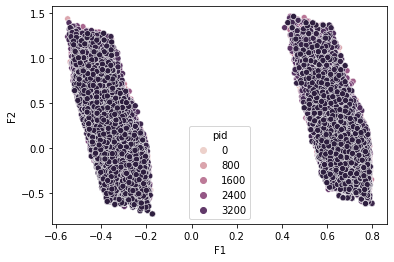

In [ ]:
sns.scatterplot(x='F1',y='F2',data=pca_df,hue='pid')

# Sentiment Analysis on Track Names

In our data, we will perform a simply sentiment analysis using subjectivity and polarity form TextBlob package.

Subjectivity (0,1): The amount of personal opinion and factual information contained in the text.
Polarity (-1,1): The degree of strong or clearly defined sentiment accounting for negation.
We will then use one-hot encoding to list the sentiment of the song titles as one of the input.

In [ ]:
!pip install textblob
from textblob import TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Subjectivity:     
Subjectivity refers to the degree to which a person is personally involved in an object. What matters the most here are personal connections and individual experiences with that object, which may or may not differ from someone else’s point of view.

# Polarity:     
Polarity refers to the strength of an opinion. It could be positive or negative. If something has a strong positive feeling or emotion associated with it, such as admiration, trust, love; this will indeed have a certain orientation towards all other aspects of that object’s existence.

In [ ]:
def getSubjectivity(text):
  '''
  Getting the Subjectivity using TextBlob
  '''
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  '''
  Getting the Polarity using TextBlob
  '''
  return TextBlob(text).sentiment.polarity

def getAnalysis(score, task="polarity"):
  '''
  Categorizing the Polarity & Subjectivity score
  '''
  if task == "subjectivity":
    if score < 1/3:
      return "low"
    elif score > 1/3:
      return "high"
    else:
      return "medium"
  else:
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def sentiment_analysis(df, text_col):
  '''
  Perform sentiment analysis on text
  ---
  Input:
  df (pandas dataframe): Dataframe of interest
  text_col (str): column of interest
  '''
  df['subjectivity'] = df[text_col].apply(getSubjectivity).apply(lambda x: getAnalysis(x,"subjectivity"))
  df['polarity'] = df[text_col].apply(getPolarity).apply(getAnalysis)
  return df

In [ ]:
# Show result
sentiment_data = sentiment_analysis(data, "track_name")
sentiment_data.head()

,pid,artist_name,track_uri,artist_uri,track_name,album_uri,album_name,popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,subjectivity,polarity
0,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,0.720430,0.912210,0.813,...,0.0,0.595529,0.031225,0.006977,0.465860,0.810,0.540594,0.8,low,Neutral
1243,0,Chris Brown,3H1LCvO3fVsK2HPguhbml0,spotify:artist:7bXgB6jMjp9ATFy66eO08Z,Forever,spotify:album:1UtE4zAlSE2TlKmTFgrTg5,Exclusive - The Forever Edition,0.000000,0.675076,0.822,...,1.0,0.459805,0.034036,0.000142,0.693271,0.430,0.517110,0.8,low,Neutral
1279,0,Kesha,3uoQULcUWfnt6nc6J7Vgai,spotify:artist:6LqNN22kT3074XbTVUrhzX,Your Love Is My Drug,spotify:album:5peRwC6pQh8eaoIPtvmmOB,Animal,0.000000,0.836529,0.627,...,1.0,0.529989,0.006657,0.000000,0.553562,0.720,0.517270,0.8,high,Positive
1298,0,Ne-Yo,2nbClS09zsIAqNkshg6jnp,spotify:artist:21E3waRsmPlU7jZsS13rcj,Closer,spotify:album:1nv3KEXZPmcwOXMoLTs1vn,Year Of The Gentleman,0.000000,0.715439,0.745,...,0.0,0.526284,0.022590,0.000052,0.626441,0.576,0.543033,0.8,low,Neutral
1316,0,Justin Bieber,69ghzc538EQSVon2Gm3wrr,spotify:artist:1uNFoZAHBGtllmzznpCI3s,One Less Lonely Girl,spotify:album:1rG5TDs3jYh6OU753I54CI,My World,0.741935,0.585267,0.750,...,1.0,0.670126,0.159639,0.000000,0.723499,0.728,0.374604,0.8,high,Negative


# One-hot encoding

In [ ]:
def ohe_prep(df, column, new_name): 
    ''' 
    Create One Hot Encoded features of a specific column
    ---
    Input: 
    df (pandas dataframe): Spotify Dataframe
    column (str): Column to be processed
    new_name (str): new column name to be used
        
    Output: 
    tf_df: One-hot encoded features 
    '''
    
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "_" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

In [ ]:
# One-hot encoding for the subjectivity 
subject_ohe = ohe_prep(sentiment_data, 'subjectivity','subjectivity')
sentiment_data_ohe = pd.concat([sentiment_data,subject_ohe],axis=1)

# One-hot encoding for the polarity 
subject_ohe = ohe_prep(sentiment_data, 'polarity','polarity')
sentiment_data_ohe = pd.concat([sentiment_data_ohe,subject_ohe],axis=1)

In [ ]:
sentiment_data_ohe.head()

,pid,artist_name,track_uri,artist_uri,track_name,album_uri,album_name,popularity,danceability,energy,...,tempo,time_signature,subjectivity,polarity,subjectivity_high,subjectivity_low,subjectivity_medium,polarity_Negative,polarity_Neutral,polarity_Positive
0,0.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,0.72043,0.91221,0.813,...,0.540594,0.8,low,Neutral,0.0,1.0,0.0,0.0,1.0,0.0
1,123.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,0.72043,0.91221,0.813,...,0.540594,0.8,low,Neutral,0.0,1.0,0.0,0.0,1.0,0.0
2,218.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,0.72043,0.91221,0.813,...,0.540594,0.8,low,Neutral,1.0,0.0,0.0,0.0,0.0,1.0
3,342.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,0.72043,0.91221,0.813,...,0.540594,0.8,low,Neutral,0.0,1.0,0.0,0.0,1.0,0.0
4,382.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,0.72043,0.91221,0.813,...,0.540594,0.8,low,Neutral,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data = sentiment_data_ohe.copy()

# Removing irrelevent columns

In [ ]:
data.columns

Index(['pid', 'artist_name', 'track_uri', 'artist_uri', 'track_name',
       'album_uri', 'album_name', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'subjectivity', 'polarity', 'subjectivity_high', 'subjectivity_low',
       'subjectivity_medium', 'polarity_Negative', 'polarity_Neutral',
       'polarity_Positive'],
      dtype='object')

we are not removing pid,track_uri to know which tracks belongs to which playlists

In [ ]:
data.drop(columns=['artist_name', 'artist_uri', 'track_name',
       'album_uri', 'album_name' , 'subjectivity', 'polarity'],inplace=True)

In [ ]:
data.head()

,pid,track_uri,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,time_signature,subjectivity_high,subjectivity_low,subjectivity_medium,polarity_Negative,polarity_Neutral,polarity_Positive
0,0.0,0UaMYEvWZi0ZqiDOoHU3YI,0.72043,0.91221,0.813,0.363636,0.842733,0.0,0.595529,0.031225,...,0.46586,0.81,0.540594,0.8,0.0,1.0,0.0,0.0,1.0,0.0
1,123.0,0UaMYEvWZi0ZqiDOoHU3YI,0.72043,0.91221,0.813,0.363636,0.842733,0.0,0.595529,0.031225,...,0.46586,0.81,0.540594,0.8,0.0,1.0,0.0,0.0,1.0,0.0
2,218.0,0UaMYEvWZi0ZqiDOoHU3YI,0.72043,0.91221,0.813,0.363636,0.842733,0.0,0.595529,0.031225,...,0.46586,0.81,0.540594,0.8,1.0,0.0,0.0,0.0,0.0,1.0
3,342.0,0UaMYEvWZi0ZqiDOoHU3YI,0.72043,0.91221,0.813,0.363636,0.842733,0.0,0.595529,0.031225,...,0.46586,0.81,0.540594,0.8,0.0,1.0,0.0,0.0,1.0,0.0
4,382.0,0UaMYEvWZi0ZqiDOoHU3YI,0.72043,0.91221,0.813,0.363636,0.842733,0.0,0.595529,0.031225,...,0.46586,0.81,0.540594,0.8,1.0,0.0,0.0,1.0,0.0,0.0


# Saving Dataset

In [ ]:
data.to_csv("/content/drive/MyDrive/Datasets/Final_Data.csv")